# 回帰モデルを作る手順
1. データを読み込む
1. データから目的変数を取り出す
1. データから説明変数を取り出す
1. LinearRegressionオブジェクトを用意する
1. モデルを学習する

## 1. データを読み込む

In [1]:
import pandas as pd

In [2]:
train = pd.read_csv('./data/train.csv', encoding='ms932')

In [3]:
train.head()

,datetime,vol,name,temperature,special,curry
0,2019-01-06,1385,カレー入りソーセージカツ,7.3,0,1
1,2019-01-07,1376,豚肉の生姜焼,9.8,0,0
2,2019-01-08,1215,鶏チリソース,10.9,0,0
3,2019-01-09,837,手作りロースカツ,5.1,0,0
4,2019-01-13,1341,鶏の照り焼きマスタード,5.8,0,0


## 2. データから目的変数を取り出す

In [4]:
y = train['vol']
y

0      1385
1      1376
2      1215
3       837
4      1341
       ... 
126     560
127    1309
128     579
129     436
130     494
Name: vol, Length: 131, dtype: int64

## 3. データから説明変数を取り出す

In [5]:
X = train[['temperature']]

## 4. LinearRegressionオブジェクトを用意する

In [6]:
from sklearn.linear_model import LinearRegression

In [7]:
model = LinearRegression()

## 5. モデルを学習する

In [8]:
model.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [9]:
model.coef_

array([-20.4366254])

In [10]:
model.intercept_

1220.5943567230104

# 予測モデルの精度を評価する

In [11]:
test = pd.read_csv('./data/test.csv', encoding='ms932')
test.head()

,datetime,vol,name,temperature,special,curry
0,2019-07-16,620,豚すき焼き,30.1,0,0
1,2019-07-17,462,エビフライ,25.6,0,0
2,2019-07-21,564,チンジャオロース,30.2,0,0
3,2019-07-22,622,八宝菜,32.0,0,0
4,2019-07-23,707,ジャンボチキンカツ,32.5,0,0


In [12]:
testX = test[['temperature']]

In [13]:
pred = model.predict(testX)
pred

array([605.45193216, 697.41674646, 603.40826962, 566.6223439 ,
       556.4040312 , 533.92374326, 629.97588264, 599.32094454,
       595.23361946, 556.4040312 , 552.31670612, 552.31670612,
       519.61810548, 513.48711786, 564.57868136, 585.01530676,
       558.44769374, 619.75756994, 562.53501882, 540.05473088,
       540.05473088, 546.1857185 , 544.14205596, 689.2420963 ,
       685.15477122, 791.42522331, 779.16324807, 707.63505916,
       742.37732235, 625.88855756, 674.93645852, 679.0237836 ,
       603.40826962, 748.50830997, 672.89279598, 709.6787217 ,
       773.03226045, 662.67448328, 632.01954518, 709.6787217 ,
       728.07168457, 738.28999727, 705.59139662, 713.76604679,
       701.50407154, 666.76180836, 676.98012106, 646.32518296])

- MAE(Mean Absolute Error)を求める

$$
MAE(y, \hat{y}) = \frac{1}{N} \sum_{i=0}^{N-1}|y_i - \hat{y_i}| 
$$

In [14]:
from sklearn.metrics import mean_absolute_error

In [15]:
y_test = test['vol']

In [16]:
mae = mean_absolute_error(y_test, pred)
mae

162.1158425106297

# データをきちんと眺める
## 基本統計量

In [17]:
train.describe()

,vol,temperature,special,curry
count,131.000000,131.000000,131.000000,131.000000
mean,867.992366,17.253435,0.061069,0.099237
std,270.811700,8.035491,0.240376,0.300127
min,404.000000,1.200000,0.000000,0.000000
25%,637.000000,9.950000,0.000000,0.000000
50%,806.000000,18.600000,0.000000,0.000000
75%,1070.500000,23.850000,0.000000,0.000000
max,1417.000000,33.900000,1.000000,1.000000


## グラフによる可視化

In [18]:
from matplotlib import pyplot as plt

In [19]:
%matplotlib inline
plt.rcParams['font.family'] = 'meiryo'

- 折れ線グラフ

<AxesSubplot:>

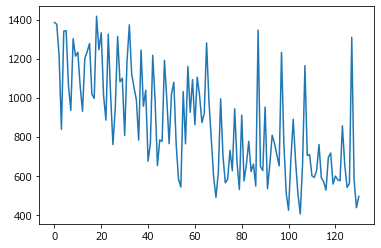

In [20]:
train['vol'].plot()

<AxesSubplot:>

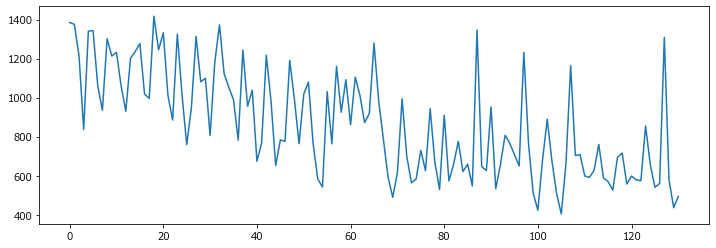

In [21]:
train['vol'].plot(figsize=(12,4))

Text(0, 0.5, '売上数')

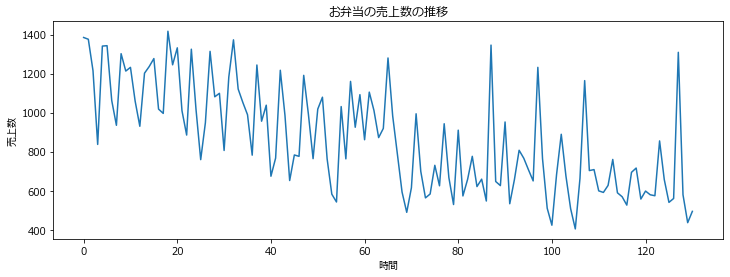

In [22]:
ax = train['vol'].plot(figsize=(12,4), title='お弁当の売上数の推移')
ax.set_xlabel('時間')
ax.set_ylabel('売上数')

- 散布図

<AxesSubplot:xlabel='temperature', ylabel='vol'>

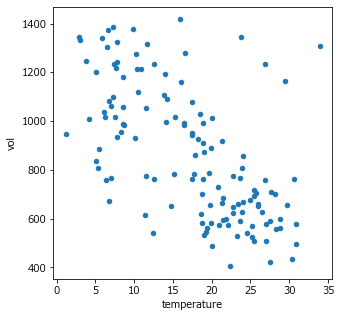

In [23]:
train.plot.scatter(x='temperature', y='vol', figsize=(5,5))

- 箱ひげ図

<AxesSubplot:title={'center':'vol'}, xlabel='[special]'>

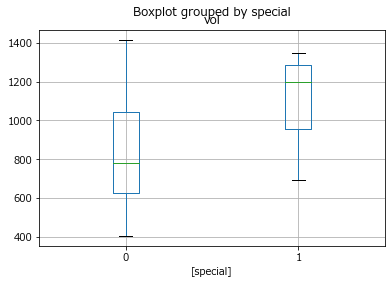

In [24]:
train[['vol','special']].boxplot(by='special')

<AxesSubplot:title={'center':'vol'}, xlabel='[curry]'>

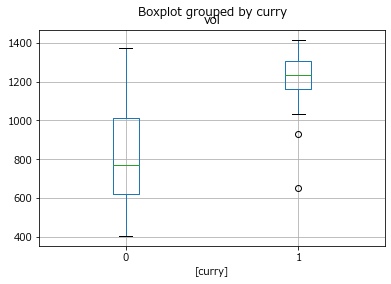

In [25]:
train[['vol','curry']].boxplot(by='curry')

## 予測モデルを改善する

In [26]:
y = train['vol']

In [27]:
X = train[['temperature','special','curry']]

In [28]:
model2 = LinearRegression()

In [29]:
model2.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [30]:
testX = test[['temperature','special','curry']]

In [31]:
pred2 = model2.predict(testX)
pred2

array([ 546.07885997,  645.33987923,  543.87305954,  504.16865184,
        493.1396497 ,  720.35736977,  572.54846511,  539.46145869,
        535.04985783,  493.1396497 ,  488.72804884,  488.72804884,
        687.08152987,  446.81784071,  501.96285141, 1009.14866834,
        495.34545013,  561.51946297,  499.75705098,  475.49324628,
        475.49324628,  482.11064756,  731.38637191,  636.51667752,
        865.75136454,  746.80669892,  733.57189635,  656.36888137,
        693.86748865,  568.13686425,  621.07607452,  625.48767538,
        543.87305954,  700.48488993,  618.8702741 ,  658.5746818 ,
        726.95449507, 1092.96908461,  574.75426554,  658.5746818 ,
        678.42688565,  689.45588779,  654.16308095,  662.98628266,
        649.75148009,  612.25287281,  623.28187495,  590.19486853])

In [32]:
y_test = test['vol']
mae2 = mean_absolute_error(y_test, pred2)
mae2

127.89006871992159

In [33]:
dic = {'予測値':pred2, '実績値':y_test}
type(dic)

dict

In [34]:
result = pd.DataFrame(dic)
result.head()

,予測値,実績値
0,546.078860,620
1,645.339879,462
2,543.873060,564
3,504.168652,622
4,493.139650,707


Text(0, 0.5, '売上数')

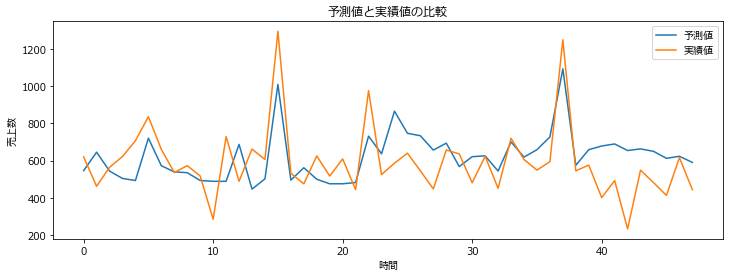

In [35]:
ax = result.plot(title='予測値と実績値の比較', figsize=(12,4))
ax.set_xlabel('時間')
ax.set_ylabel('売上数')